In [56]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [57]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'

all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']

# path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac

In [58]:
df_markers = pd.DataFrame()

for i,v in enumerate(all_participants): 
    participant = v
    
    folder = path + participant +'/'
    
    df_ = pd.read_csv(folder+ participant + '_' + epoch_type + '_all_marker.csv', index_col = 0)
    df_['participant'] = i
    df_markers = df_markers.append(df_)
    
df_markers.to_csv('all_markers.csv')

# Univariate analysis: On-task Vs Mind- Wandering
This can only be performed for PC probes  as they are the only ones with On-task reports.

In [62]:
df_mind = (
    df_markers
    .query("probe == 'PC'")
    .assign(
    mind2 = lambda df: np.where(df.mind == 'on-task', 'on-task', 'mw'))
#     .query("mind != 'sMW'") #if you want to test against just one of the mw
    .drop(['participant', 'probe', 'mind'], axis = 1) # drop mind or mind2 also
)

AUC wSMI = 0.5185755162013765
AUC p_e = 0.4982445286520764
AUC k = 0.48337328899543736
AUC b = 0.47190472507926695
AUC b_n = 0.4428273142061712
AUC g = 0.5059701492537313
AUC g_n = 0.507424019797386
AUC t = 0.5283040754775346
AUC t_n = 0.563026834738226
AUC d = 0.4825999535998763
AUC d_n = 0.4729796612790968
AUC a_n = 0.49499651999072
AUC a = 0.4967442579846879
AUC CNV = 0.49222024592065583
AUC P1 = 0.546763591369577
AUC P3a = 0.4988245301987472
AUC P3b = 0.5417446446523857


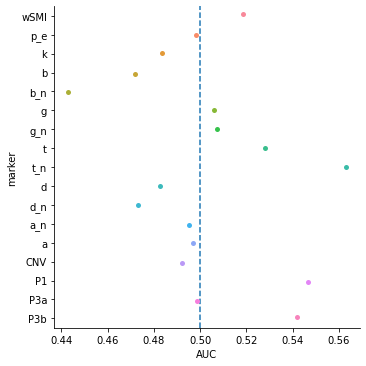

In [63]:
markers = df_mind.drop('mind2', axis = 1).columns

AUC = []
for i in markers:
    auc = roc_auc_score(df_mind['mind2'], df_mind[i])
    print(f'AUC {i} = {auc}')
    AUC.append([i, auc])
df_auc = pd.DataFrame(AUC, columns = ['marker', 'AUC'])

sns.catplot(x = 'AUC', y = 'marker', data = df_auc, orient = 'h')
plt.axvline(x = 0.5, linestyle = 'dashed')
plt.show()

AUC wSMI = 0.526966205243214
AUC p_e = 0.5382337019565384
AUC k = 0.4379166344443586
AUC b = 0.47220632588353567
AUC b_n = 0.44304384811692826
AUC g = 0.45673961797231455
AUC g_n = 0.5723223261928698
AUC t = 0.5323176861804965
AUC t_n = 0.4407315752842007
AUC d = 0.512052432139819
AUC d_n = 0.5480395947722527
AUC a_n = 0.5377001005336014
AUC a = 0.5467481246616658
AUC CNV = 0.5310339494238651
AUC P1 = 0.4375415667775113
AUC P3a = 0.5351016936045162
AUC P3b = 0.5587425566468177
Index(['mw', 'on-task'], dtype='object')


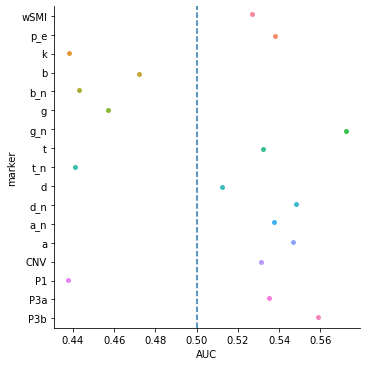

In [64]:
markers = df_mind.drop('mind2', axis = 1).columns

AUC = []
for i in markers:
    y, label = pd.factorize(df_mind['mind2'])
    X = df_mind[i].astype('float32').values.reshape(-1,1)
    svc = SVC(probability=True)
    svc.fit(X, y)
    y_proba = svc.predict_proba(X)
    auc = roc_auc_score(y, y_proba[:,0])
    print(f'AUC {i} = {auc}')
    AUC.append([i, auc])

print(label)
df_auc = pd.DataFrame(AUC, columns = ['marker', 'AUC'])

sns.catplot(x = 'AUC', y = 'marker', data = df_auc, orient = 'h')
plt.axvline(x = 0.5, linestyle = 'dashed')
plt.show()

{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC wSMI = 0.5279372368924609
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC p_e = 0.4984691924990433
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC k = 0.5015308075009568
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC b = 0.5373134328358209
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC b_n = 0.5870646766169153
{'SVM__C': 1000000.0, 'SVM__gamma': 0.01}
AUC g = 0.4573287409108305
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC g_n = 0.4869881362418676
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC t = 0.541523153463452
{'SVM__C': 1000000.0, 'SVM__gamma': 0.01}
AUC t_n = 0.47895139686184457
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}
AUC d = 0.4556065824722541
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC d_n = 0.5195177956371986
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC a_n = 0.492920015308075
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC a = 0.518369690011481
{'SVM__C': 100, 'SVM__gamma': 0.1}
AUC CNV = 0.5156907768848068
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}
AUC P1 = 0.4435514734022197
{'SVM__C

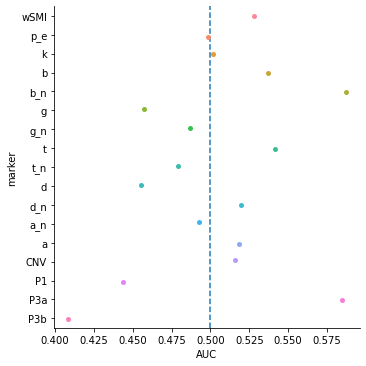

In [65]:
markers = df_mind.drop('mind2', axis = 1).columns

AUC = []
for i in markers:
    y, label = pd.factorize(df_mind['mind2'])
    X = df_mind[i].astype('float32').values.reshape(-1,1)
    steps = [('scaler', StandardScaler()), ('SVM', SVC(probability=True))]
    pipe = Pipeline(steps)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
    parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
    grid = GridSearchCV(pipe, param_grid=parameteres, cv=5)
    grid.fit(X_train, y_train)
    y_proba = grid.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_proba[:,0])
    print(grid.best_params_)
    print(f'AUC {i} = {auc}')
    AUC.append([i, auc])

print(label)
df_auc = pd.DataFrame(AUC, columns = ['marker', 'AUC'])

sns.catplot(x = 'AUC', y = 'marker', data = df_auc, orient = 'h')
plt.axvline(x = 0.5, linestyle = 'dashed')
plt.show()

# Univariate analysis: dMW Vs sMW
This will be only performed in SC as they have more trials

In [66]:
df_mw = (
    df_markers
    .query("probe == 'SC'")
    .query("mind != 'on-task'")
    .drop(['participant', 'probe'], axis = 1)
)

AUC wSMI = 0.48811850136305523
AUC p_e = 0.4137260172940856
AUC k = 0.5191409305996408
AUC b = 0.42768397798433266
AUC b_n = 0.490851504530306
AUC g = 0.47921383940418466
AUC g_n = 0.5319525291480129
AUC t = 0.457524719376062
AUC t_n = 0.504772416312548
AUC d = 0.48966163146158803
AUC d_n = 0.5619276805315743
AUC a_n = 0.4289832745720421
AUC a = 0.4127317279955334
AUC CNV = 0.5166944102675448
AUC P1 = 0.5171234883183932
AUC P3a = 0.5474432807066519
AUC P3b = 0.5199667766071472


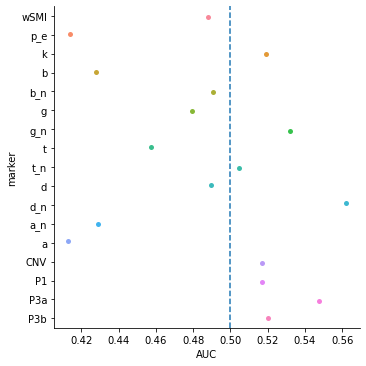

In [67]:
markers = df_mw.drop('mind', axis = 1).columns

AUC = []
for i in markers:
    auc = roc_auc_score(df_mw['mind'], df_mw[i])
    print(f'AUC {i} = {auc}')
    AUC.append([i, auc])
df_auc = pd.DataFrame(AUC, columns = ['marker', 'AUC'])

sns.catplot(x = 'AUC', y = 'marker', data = df_auc, orient = 'h')
plt.axvline(x = 0.5, linestyle = 'dashed')
plt.show()

AUC wSMI = 0.5393166458158859
AUC p_e = 0.5811159992693611
AUC k = 0.5484173223461781
AUC b = 0.6029912254400205
AUC b_n = 0.5368378153895994
AUC g = 0.56145121434258
AUC g_n = 0.5591817533266473
AUC t = 0.5358482649048618
AUC t_n = 0.543971453385581
AUC d = 0.49778568154481884
AUC d_n = 0.5595599968293028
AUC a_n = 0.5744695974937706
AUC a = 0.5839778120121175
AUC CNV = 0.5499785460974576
AUC P1 = 0.47625423477634526
AUC P3a = 0.5485263150639137
AUC P3b = 0.5345743855912489
Index(['dMW', 'sMW'], dtype='object')


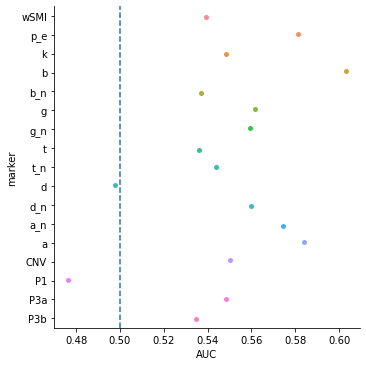

In [68]:
markers = df_mw.drop('mind', axis = 1).columns

AUC = []
for i in markers:
    y, label = pd.factorize(df_mw['mind'])
    X = df_mw[i].astype('float32').values.reshape(-1,1)
    svc = SVC(probability=True)
    svc.fit(X, y)
    y_proba = svc.predict_proba(X)
    auc = roc_auc_score(y, y_proba[:,1])
    print(f'AUC {i} = {auc}')
    AUC.append([i, auc])
print(label)
df_auc = pd.DataFrame(AUC, columns = ['marker', 'AUC'])

sns.catplot(x = 'AUC', y = 'marker', data = df_auc, orient = 'h')
plt.axvline(x = 0.5, linestyle = 'dashed')
plt.show()

{'SVM__C': 100, 'SVM__gamma': 0.1}
AUC wSMI = 0.4269694360740422
{'SVM__C': 100, 'SVM__gamma': 0.1}
AUC p_e = 0.42097503228583727
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}
AUC k = 0.45074257425742575
{'SVM__C': 100, 'SVM__gamma': 0.1}
AUC b = 0.365002152389152
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}
AUC b_n = 0.4672836848902281
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}
AUC g = 0.4850624192854068
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}
AUC g_n = 0.3837386999569522
{'SVM__C': 1000000.0, 'SVM__gamma': 0.01}
AUC t = 0.4339539388721481
{'SVM__C': 100, 'SVM__gamma': 0.1}
AUC t_n = 0.4979875161429187
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC d = 0.4716960826517435
{'SVM__C': 100, 'SVM__gamma': 0.1}
AUC d_n = 0.4294877313818338
{'SVM__C': 1000000.0, 'SVM__gamma': 0.01}
AUC a_n = 0.4062419285406801
{'SVM__C': 10, 'SVM__gamma': 0.01}
AUC a = 0.39119672836848907
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}
AUC CNV = 0.5512268618166165
{'SVM__C': 0.001, 'SVM__gamma': 0.1}
AUC P1 = 0.5040034438226432
{'

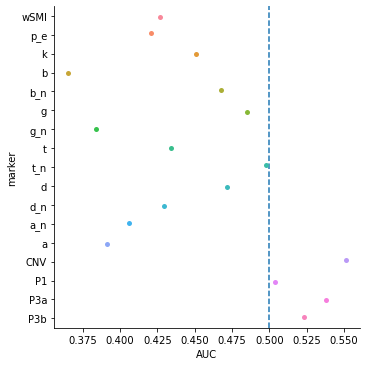

In [69]:
markers = df_mw.drop('mind', axis = 1).columns

AUC = []
for i in markers:
    y, label = pd.factorize(df_mw['mind'])
    X = df_mw[i].astype('float32').values.reshape(-1,1)
    steps = [('scaler', StandardScaler()), ('SVM', SVC(probability=True))]
    pipe = Pipeline(steps)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
    parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
    grid = GridSearchCV(pipe, param_grid=parameteres, cv=5)
    grid.fit(X_train, y_train)
    y_proba = grid.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_proba[:,0])
    print(grid.best_params_)
    print(f'AUC {i} = {auc}')
    AUC.append([i, auc])

print(label)
df_auc = pd.DataFrame(AUC, columns = ['marker', 'AUC'])

sns.catplot(x = 'AUC', y = 'marker', data = df_auc, orient = 'h')
plt.axvline(x = 0.5, linestyle = 'dashed')
plt.show()